In [1]:
import vamp
import numpy as np
from maelzel.snd import vamptools
from maelzel.snd import plotting
from maelzel.snd import deverb
import sndfileio
import matplotlib.pyplot as plt
from pitchtools import *

In [2]:
db2amp(-40)

0.01

In [3]:
# samples, sr = sndfileio.sndread('../snd/piano-pitchtest-Cmaj.flac')
samples, sr = sndfileio.sndread('/home/em/Lib/snd/samples/test/piano-pitchtest-2.flac')

samples = deverb.removeSustain(samples, sr, morphTime=0.01, )

# data = vamptools.pyinPitchTrack(samples, sr, threshDistr='beta30', lowAmpSuppression=db2amp(-60))
dt, freqs = vamptools.pyinSmoothPitch(samples, sr, lowAmpSuppression=db2amp(-50))
times = np.linspace(0, dt*len(freqs), num=len(freqs))

LibXtract compiled with ooura FFT


mnOut size: 1789
m_pitchTrack size: 1789


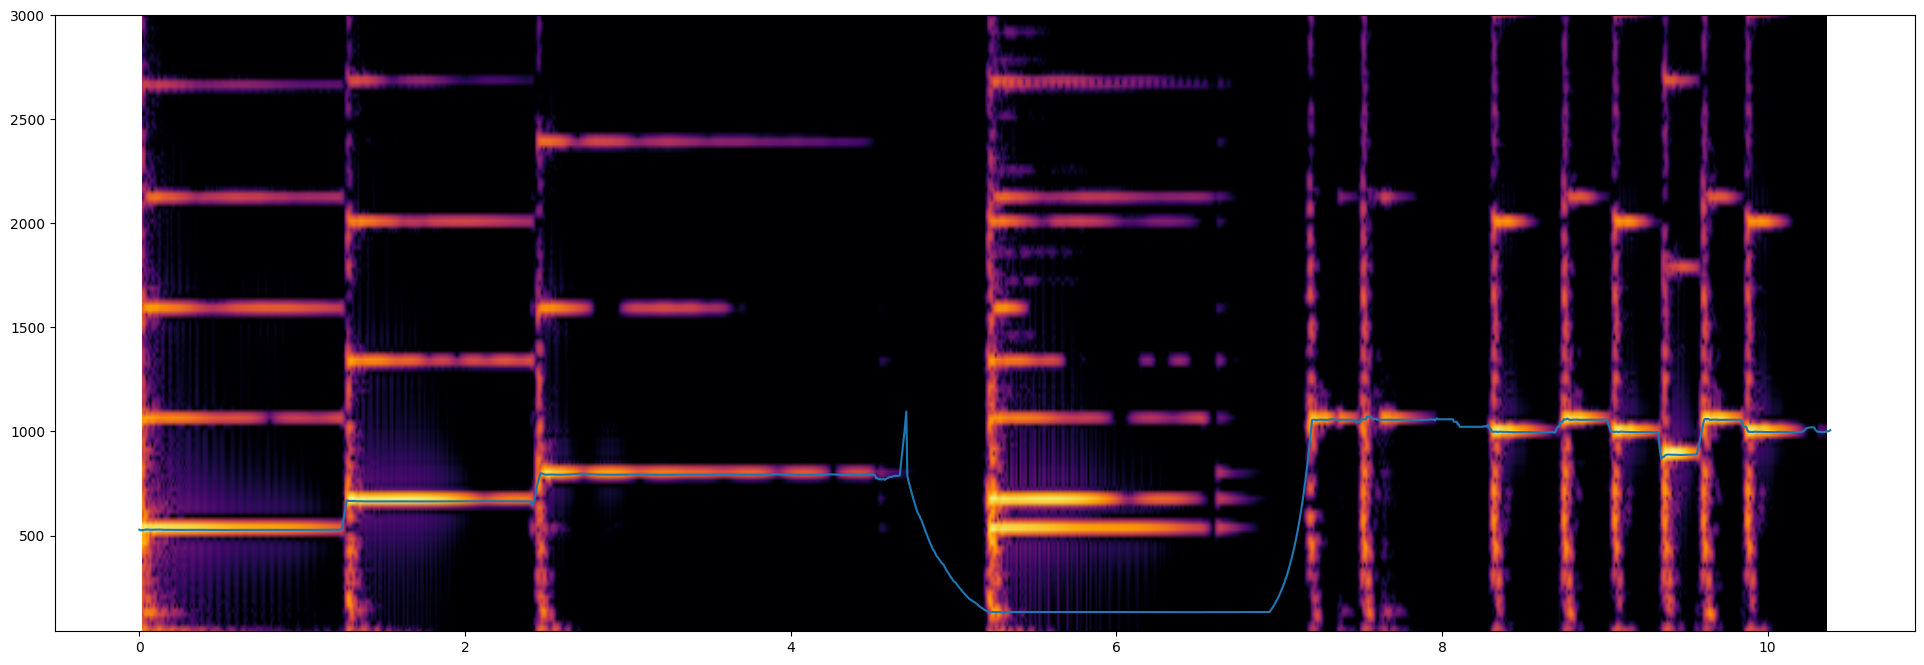

In [4]:
axes = plt.figure(figsize=(24, 8)).add_subplot()
plotting.plotSpectrogram(samples, sr, axes=axes, maxfreq=3000)
# axes.plot(data[:,0], data[:,1])
axes.plot(times, freqs)

In [12]:
samples, sr = sndfileio.sndread('../snd/piano-pitchtest-Cmaj.flac')

params = {
        'lowampsuppression': 0.1,
        'onsetsensitivity': 0.7,
        'prunethresh': 0.1,
        'threshdistr': 2,
        'outputunvoiced': 2
    }
result = vamp.collect(data=samples, sample_rate=sr, plugin_key="pyin:pyin",
                      output="f0candidates", block_size=2048,
                      step_size=256, parameters=params)



mnOut size: 1797
m_pitchTrack size: 1797


In [13]:
result2 = vamp.collect(data=samples, sample_rate=sr, plugin_key="pyin:pyin",
                      output="f0probs", block_size=2048,
                      step_size=256, parameters=params)


mnOut size: 1797
m_pitchTrack size: 1797


In [17]:
items1 = [(r['timestamp'], r['values']) for r in result['list']]
items1

KeyError: 'values'

In [31]:
for r0, r1 in zip(result['list'], result2['list']):
    print(r0['timestamp'], r0.get('values', '---'))
    print(r1['timestamp'], r1.get('values', '...'))
    print("-------------------")

 0.011609977 [525.66705  261.78497  174.27708  131.38853  105.24745   87.64965
  75.104805  65.647026  58.282433  52.416866  47.659485  43.711906]
 0.011609977 [0.04403313 0.00747562 0.00158361 0.00130725 0.00158361 0.00747562
 0.03057572 0.05255742 0.00673235 0.00186962 0.00032694 0.00057407]
-------------------
 0.017414966 [524.8375   261.79636  174.74582  131.68169  105.24089   87.65686
  75.07743   65.612755  58.281193  52.40746   47.641163  43.69584 ]
 0.017414966 [0.09003814 0.00396532 0.00143319 0.00143319 0.00301084 0.00663881
 0.00947814 0.01318177 0.01184414 0.00663881 0.00301084 0.00301084]
-------------------
 0.023219955 [526.89795  264.12512  175.88974  131.74666  105.26313   87.70699
  75.115585  65.64585   58.32213   52.478638  47.702213  43.740307]
 0.023219955 [0.14030163 0.00529601 0.00219341 0.00219341 0.00345658 0.00693349
 0.01450576 0.02238513 0.02017396 0.01147383 0.00460792 0.00345658]
-------------------
 0.029024943 [524.9677   262.26443  174.8333   131.0979

In [22]:
r0['timestamp']

 0.011609977

In [25]:
r0['values']

array([524.8375  , 261.79636 , 174.74582 , 131.68169 , 105.24089 ,
        87.65686 ,  75.07743 ,  65.612755,  58.281193,  52.40746 ,
        47.641163,  43.69584 ], dtype=float32)